# Classify(Sentiment analysis) movie review as positive or negative, based on text content of the reviews.
* Loading IMDB data
* Preparing, visualizing and encoding the data
* Building Network
* Evaluating the model


## Loading IMDB data
Working with IMDB dataset(already preprocessed in keras):
* Set of 50,000 highly polarized reviews data
* Split into 25,000 reviews for training and 25,000 for testing
* Each set consisting 50% Negative and 50% positive  
* Each review is a list of word indices(encoding a sequence of words)
* In labels 1 means positive review 0 means negative review

In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


## Preparing, exploring and splitting data

In [ ]:
# check size
train_data.size, train_labels.size, test_data.size, test_labels.size

(25000, 25000, 25000, 25000)

In [ ]:
# check no. of sample
len(train_data), len(test_data)

(25000, 25000)

In [ ]:
# check datatype
train_data.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [ ]:
# check shape
train_data.shape, train_labels.shape

((25000,), (25000,))

In [ ]:
len(train_data[0]), len(train_data[23])

(218, 888)

For kick, Decoding the data...
### Creating a helper function to decode the review

In [ ]:
def decoded_review(n):
  """
  Returns the review in English Text
  """
  #word_index is a dictionary mapping words to an integer index
  word_index = imdb.get_word_index()

  #reverse it, mapping integer indices to words
  reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
  return ' '.join( [reverse_word_index.get(i-3,'?') for i in train_data[n]])
  #note the indices are offset by 3 bcoz 0,1 and 2 arereserved indices for "padding", "start of sequence" and  "unknown".


In [ ]:
decoded_review(7)

1641221/1641221 [==============================] - 0s 0us/step


"? the ? tells the story of the four hamilton siblings teenager francis ? ? twins ? joseph ? ? ? ? the ? david samuel who is now the surrogate parent in charge the ? move house a lot ? is unsure why is unhappy with the way things are the fact that his brother's sister kidnap ? murder people in the basement doesn't help relax or calm ? nerves either francis ? something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell ? phil ? as the butcher brothers who's only other film director's credit so far is the april ? day 2008 remake enough said this was one of the ? to die ? at the 2006 after dark ? or whatever it's called in keeping with pretty much all the other's i've seen i thought the ? was complete total utter crap i found the character's really poor very unlikable the slow moving story failed to capture my imagination or sustain my interest over it's 85 a half minute too long ? minute duration t

In [ ]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

### Encoding the integer Sequence into a binary matrix:
One-hot encode list to turn them into 10,000 dimensional vectors of 0s and 1s

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  """
  One-hot encode the data
  """
  results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape(len(sequence), dimension)
  for i , sequence in enumerate(sequences):
    results[i, sequence] = 1 # set specific indices of results[i] to 1s
  return results

**Note**: Data can be one-hot encoded with these function or other inbuilt methods too

In [ ]:
X_train = vectorize_sequences(train_data) # vectorized training data
X_test = vectorize_sequences(test_data) # vectorized test data

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorizing the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Creating validation set

In [ ]:
x_val = X_train[:10000] # separating 10000 samples for validation set
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Building the Model and Evaluating it

### Creating model, compiling and fitting

In [ ]:
# Creating the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# compiling the model
model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)

In [ ]:
# fitting the model
history_1 = model_1.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 71ms/step - loss: 2.3661e-05 - accuracy: 1.0000 - val_loss: 1.9987 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 1.5048e-05 - accuracy: 1.0000 - val_loss: 2.0041 - val_accuracy: 0.8654
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 1.3231e-05 - accuracy: 1.0000 - val_loss: 2.0046 - val_accuracy: 0.8651
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 1.2326e-05 - accuracy: 1.0000 - val_loss: 2.0059 - val_accuracy: 0.8649
Epoch 5/20
30/30 [==============================] - 2s 65ms/step - loss: 1.1562e-05 - accuracy: 1.0000 - val_loss: 2.0092 - val_accuracy: 0.8653
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 1.1003e-05 - accuracy: 1.0000 - val_loss: 2.0119 - val_accuracy: 0.8655
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 1.0572e-05 - accuracy: 1.0000 - val_loss: 2.0150 - val_ac

Evaluate prediction

In [ ]:
model_1.evaluate(X_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 2.2104 - accuracy: 0.8521


[2.2103803157806396, 0.8520799875259399]

### Visualize the model performance

Create a helper Function to plot loss and accuracy curve

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(history):
    """
    Plots loss and validation metrics from history
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) #no. of epochs

    # create loss plot
    plt.plot(epochs, loss, 'bo', label="Training loss")
    plt.plot(epochs, val_loss, 'r' , label="Validation loss")
    plt.title("Training and Validation loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()

    # creating accuracy plot
    plt.figure()
    plt.plot(epochs, accuracy, 'bo', label="Training accuracy")
    plt.plot(epochs, val_accuracy, 'r', label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()


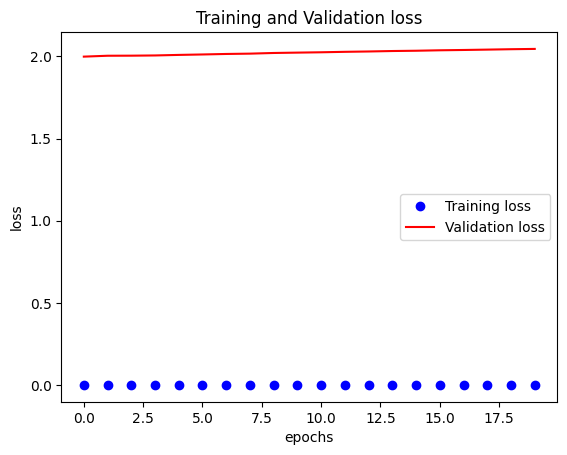

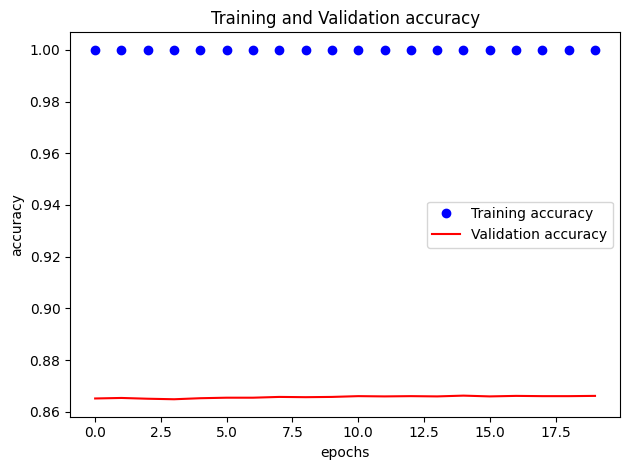

In [ ]:
plot_curve(history_1)

It seems the model is overfitting. So, let's use the same model and stop the model early

In [ ]:
model_2 = tf.keras.models.clone_model(model_1)

# compile the model
model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_2 = model_2.fit(partial_x_train,
            partial_y_train,
            epochs=4,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 65ms/step - loss: 0.5542 - accuracy: 0.7747 - val_loss: 0.4066 - val_accuracy: 0.8561
Epoch 2/4
30/30 [==============================] - 1s 44ms/step - loss: 0.3105 - accuracy: 0.8951 - val_loss: 0.3037 - val_accuracy: 0.8840
Epoch 3/4
30/30 [==============================] - 1s 43ms/step - loss: 0.2141 - accuracy: 0.9270 - val_loss: 0.2801 - val_accuracy: 0.8889
Epoch 4/4
30/30 [==============================] - 1s 43ms/step - loss: 0.1608 - accuracy: 0.9482 - val_loss: 0.2815 - val_accuracy: 0.8894


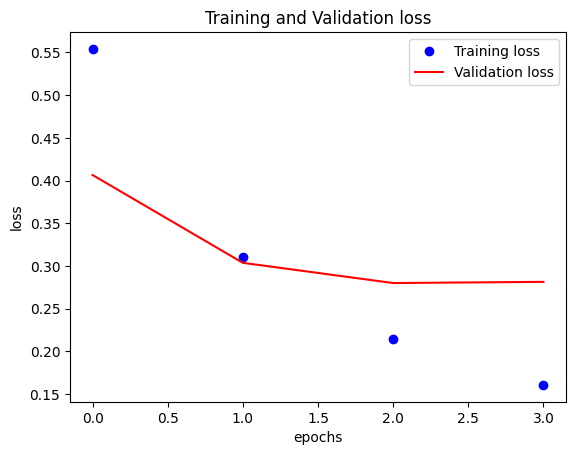

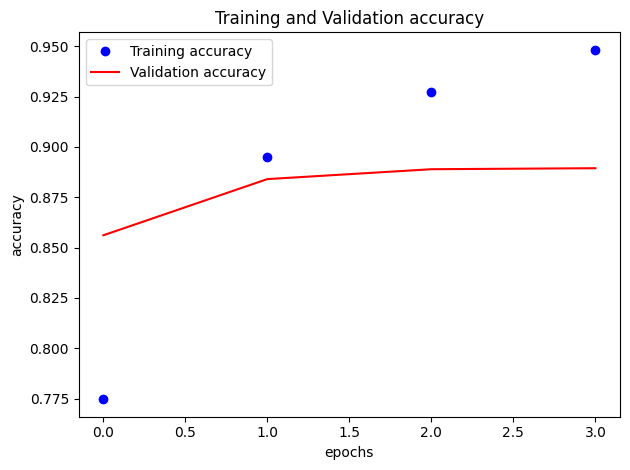

In [ ]:
plot_curve(history_2)

In [ ]:
model_2.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3020 - accuracy: 0.8770


[0.301974892616272, 0.8769999742507935]

we have increased the accuracy by some percent.. let's try and increase a layer and see

In [ ]:
# Creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss= "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


# fit the model
history_3 = model_3.fit(partial_x_train,
            partial_y_train,
            epochs=4,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 6s 118ms/step - loss: 0.5705 - accuracy: 0.7657 - val_loss: 0.4096 - val_accuracy: 0.8619
Epoch 2/4
30/30 [==============================] - 2s 75ms/step - loss: 0.2976 - accuracy: 0.9005 - val_loss: 0.2868 - val_accuracy: 0.8895
Epoch 3/4
30/30 [==============================] - 3s 117ms/step - loss: 0.1862 - accuracy: 0.9356 - val_loss: 0.2860 - val_accuracy: 0.8877
Epoch 4/4
30/30 [==============================] - 3s 86ms/step - loss: 0.1328 - accuracy: 0.9575 - val_loss: 0.2960 - val_accuracy: 0.8865


In [ ]:
model_3.evaluate(X_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3143 - accuracy: 0.8761


[0.3143464922904968, 0.8761199712753296]

It seems increasing layer did not work out lets increase units in the layer and try

In [ ]:
# Creating the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
    loss= "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


# fit the model
history_4 = model_4.fit(partial_x_train,
            partial_y_train,
            epochs=4,
            batch_size=32,
            validation_data=(x_val, y_val))

Epoch 1/4
469/469 [==============================] - 7s 12ms/step - loss: 0.3510 - accuracy: 0.8479 - val_loss: 0.2843 - val_accuracy: 0.8813
Epoch 2/4
469/469 [==============================] - 6s 13ms/step - loss: 0.1649 - accuracy: 0.9372 - val_loss: 0.3156 - val_accuracy: 0.8803
Epoch 3/4
469/469 [==============================] - 5s 10ms/step - loss: 0.0888 - accuracy: 0.9668 - val_loss: 0.4248 - val_accuracy: 0.8659
Epoch 4/4
469/469 [==============================] - 5s 11ms/step - loss: 0.0437 - accuracy: 0.9835 - val_loss: 0.5615 - val_accuracy: 0.8695


 it didn't workout too let's go with model 2 which has ~88% accuracy

## Saving model and loading model

In [ ]:
# saving the model
model_2.save("trained_model_2")

In [ ]:
# let's check out that by loading it
load_model_2 = tf.keras.models.load_model("trained_model_2")

In [ ]:
# compare both
model_2.evaluate(X_test, y_test), load_model_2.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3020 - accuracy: 0.8770


([0.301974892616272, 0.8769999742507935],
 [0.301974892616272, 0.8769999742507935])

Voila! it's same